In [148]:
import pandas as pd
import numpy as np
import os
import matplotlib.patches as patches
import matplotlib as mpl
import matplotlib.pyplot as plt
from modplot import velovect
mpl.rc('figure',  figsize=(8, 8))

In [163]:
times = [250,500,750]
# times = [0,250,550,750]
# times = [0,250]

(96.0, 159.0)
1
(96.0, 159.0)
2
(96.0, 159.0)
3
(96.0, 159.0)
1
(96.0, 159.0)
2
(96.0, 159.0)
3
(96.0, 159.0)
1
(96.0, 159.0)
2
(96.0, 159.0)
3


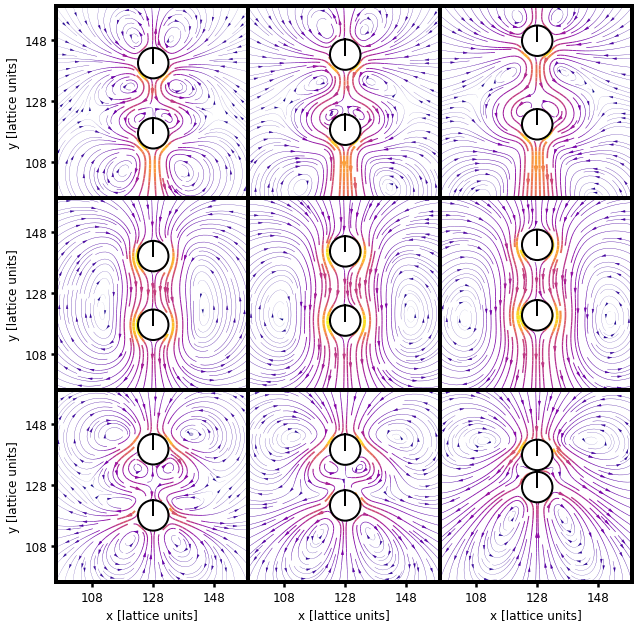

In [211]:
boxsize = 32
betas = ['-5','0','5']
borderwidth = 4
Y, X = np.mgrid[128 - boxsize:128 + boxsize,128 - boxsize:128 + boxsize]
fig, axes = plt.subplots(ncols=len(times),nrows=len(betas),sharex=True, sharey=True,figsize=(8,8))
betaIndex = 0
for beta in betas:
    
    index = 0
    for i in times:
        
        U = np.loadtxt("U"+beta + "_"+str(i) + ".txt")
        V = np.loadtxt("V"+beta + "_"+str(i) + ".txt")
        px = np.loadtxt("px" + beta + "_"+str(i) + ".txt")
        py = np.loadtxt("py" + beta + "_"+str(i) + ".txt")
        s=1
        
        U = U[128 - boxsize:128 + boxsize,128 - boxsize:128 + boxsize]  # == Lons[Xspan[0]:Xspan[1]+1, Yspan[0]:Yspan[1]+1]
        V = V[128 - boxsize:128 + boxsize,128 - boxsize:128 + boxsize]

        # f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,18))
        # ax1.quiver(X[::s,::s],Y[::s,::s],U[::s,::s],V[::s,::s],scale=5)
        # ax1.set(aspect='equal')
        # plt.xlim((0,40))
        # plt.ylim((0,40))
        ax = axes[betaIndex][index]
        ax.spines['top'].set_linewidth(borderwidth)
        ax.spines['bottom'].set_linewidth(borderwidth)
        ax.spines['left'].set_linewidth(borderwidth)
        ax.spines['right'].set_linewidth(borderwidth)
        speed = np.sqrt(U**2 + V**2)
        speedSqrd = U**2 + V**2
        # axes[index].pcolormesh(X,Y,speed)
        if index != -1:
            # lw = 10 * speedSqrd / speedSqrd.max()
            lw = 3 * speed / speed.max()
            # lw = 1
            arrsty = patches.ArrowStyle("Simple",head_length=.4, head_width=.2, tail_width=.0)
            ax.streamplot(X,Y,U,V, color=speed,density = 1.5,linewidth = lw,arrowstyle=arrsty, arrowsize=1,cmap='plasma')
            # axes[index].quiver(X,Y,U,V, color='k',density = 1,linewidth = lw,arrowstyle='->', arrowsize=2)
        # else:
        #     plt.quiver(X[::s,::s],Y[::s,::s],U[::s,::s],V[::s,::s],scale=5)
        p1pos = (px[0], py[0])
        p2pos = (px[1], py[1])
        p1direction = (0,1)
        p2direction = (0,1)
        pRadius = 5.0
        particle1 = plt.Circle(p1pos, pRadius, fill=True,linewidth=2,zorder=10,edgecolor="black",facecolor="white")
        ax.plot([px[0], px[0] + pRadius*p1direction[0]], [py[0],py[0] + pRadius*p1direction[1]], color='black', linewidth=2,zorder = 20)
        particle2 = plt.Circle(p2pos, pRadius, fill=True,linewidth=2,zorder=10,edgecolor="black",facecolor="white")
        ax.plot([px[1], px[1] + pRadius*p2direction[0]], [py[1],py[1] + pRadius*p2direction[1]], color='black', linewidth=2,zorder = 20)
        ax.add_patch(particle1)
        ax.add_patch(particle2)
        ax.set(aspect='equal')
        # axes[index].set_facecolor('black')
        # plt.title(i)
        print(ax.get_xlim())
        ax.set_xlim((96.0, 159.0))
        ax.set_ylim((96.0, 159.0))
        if i==250:
            ax.set_ylabel("y [lattice units]",fontsize=12)
        ax.set_xlabel("x [lattice units]",fontsize=12)
        # Change the x and y ticks
        ax.set_xticks([108,128,148])  # Specify the locations of the x ticks
        ax.set_yticks([108,128,148])  # Specify the locations of the y ticks
        if i == 250:
            ax.tick_params(axis='both', which='major', labelsize=12,length = 5, width = 2.5)
        else :
            ax.tick_params(axis='x', which='major', labelsize=12,length = 5, width = 2.5)
            ax.tick_params(axis='y', which='major', labelsize=12,length = 0, width = 0)

        # You can also set custom labels for the ticks if desired
        # ax.set_xticklabels(['96', '128', '144'])  # Set custom labels for the x ticks
        # ax.set_yticklabels(['96', '128', '144'])  # Set custom labels for the y ticks
        # axes[index].set_xlabel("x [lattice units]")
        # axes[index].set_ylabel("y [lattice units]")
        index+=1
        print(index)
    betaIndex+=1
plt.subplots_adjust(left=0,
                    bottom=0,
                    right=1,
                    top=1,
                    wspace=0,
                    hspace=0)


plt.savefig('C:\lbmswim\Assets\Scripts\python\coolbeans.png', dpi=600,bbox_inches='tight')
plt.show()

In [225]:
boxsize = 32
betas = ['-5','0','5']
borderwidth = 4
Y, X = np.mgrid[128 - boxsize:128 + boxsize,128 - boxsize:128 + boxsize]
fig, axes = plt.subplots(ncols=len(times), nrows=len(betas), sharex=True, sharey=True, figsize=(8, 8))
betaIndex = 0

for beta in betas:
    index = 0
    for i in times:
        U = np.loadtxt("U"+beta + "_"+str(i) + ".txt")
        V = np.loadtxt("V"+beta + "_"+str(i) + ".txt")
        px = np.loadtxt("px" + beta + "_"+str(i) + ".txt")
        py = np.loadtxt("py" + beta + "_"+str(i) + ".txt")
        s = 1
        
        U = U[128 - boxsize:128 + boxsize, 128 - boxsize:128 + boxsize]
        V = V[128 - boxsize:128 + boxsize, 128 - boxsize:128 + boxsize]

        ax = axes[betaIndex][index]
        ax.spines['top'].set_linewidth(borderwidth)
        ax.spines['bottom'].set_linewidth(borderwidth)
        ax.spines['left'].set_linewidth(borderwidth)
        ax.spines['right'].set_linewidth(borderwidth)
        speed = np.sqrt(U**2 + V**2)
        nspeed = speed / speed.max()
        lw = 3 * nspeed
        arrsty = patches.ArrowStyle("Simple", head_length=.4, head_width=.2, tail_width=.0)
        ax.streamplot(X, Y, U, V, color=nspeed, density=1.5, linewidth=lw, arrowstyle=arrsty, arrowsize=1, cmap='plasma')

        p1pos = (px[0], py[0])
        p2pos = (px[1], py[1])
        p1direction = (0, 1)
        p2direction = (0, 1)
        pRadius = 5.0
        particle1 = plt.Circle(p1pos, pRadius, fill=True, linewidth=2, zorder=10, edgecolor="black", facecolor="white")
        ax.plot([px[0], px[0] + pRadius * p1direction[0]], [py[0], py[0] + pRadius * p1direction[1]], color='black', linewidth=2, zorder=20)
        particle2 = plt.Circle(p2pos, pRadius, fill=True, linewidth=2, zorder=10, edgecolor="black", facecolor="white")
        ax.plot([px[1], px[1] + pRadius * p2direction[0]], [py[1], py[1] + pRadius * p2direction[1]], color='black', linewidth=2, zorder=20)
        ax.add_patch(particle1)
        ax.add_patch(particle2)
        ax.set(aspect='equal')
        ax.set_xlim((96.0, 159.0))
        ax.set_ylim((96.0, 159.0))
        if i == 250:
            ax.set_ylabel("y [lattice units]", fontsize=12)
        ax.set_xlabel("x [lattice units]", fontsize=12)
        ax.set_xticks([108, 128, 148])
        ax.set_yticks([108, 128, 148])
        if i == 250:
            ax.tick_params(axis='both', which='major', labelsize=12, length=5, width=2.5)
        else:
            ax.tick_params(axis='x', which='major', labelsize=12, length=5, width=2.5)
            ax.tick_params(axis='y', which='major', labelsize=12, length=0, width=0)
        
        index += 1

    betaIndex += 1

# Add a colorbar
cbar_ax = fig.add_axes([0.97, 0, 0.02, 0.7])  # Define the position of the colorbar axes
cbar = plt.colorbar(ax.collections[0], cax=cbar_ax,pad=1)  # Create the colorbar
# cbar.set_label('Speed', position=(0.5, 1.05), fontsize=12)
cbar.ax.tick_params(labelsize=10)  # Set the tick label size
plt.subplots_adjust(left=0, bottom=0, right=0.95, top=0.95, wspace=0, hspace=0)
plt.savefig('C:\lbmswim\Assets\Scripts\python\coolbeans.png', dpi=600, bbox_inches='tight')
plt.show()


KeyboardInterrupt: 

In [224]:
import sympy

chrs = sympy.symbols("a_{0:10}", Integer=True)
var = list(chrs)
print(var)
# [a_{0}, a_{1}, ..., a_{8}, a_{9}]

[a_{0}, a_{1}, a_{2}, a_{3}, a_{4}, a_{5}, a_{6}, a_{7}, a_{8}, a_{9}]


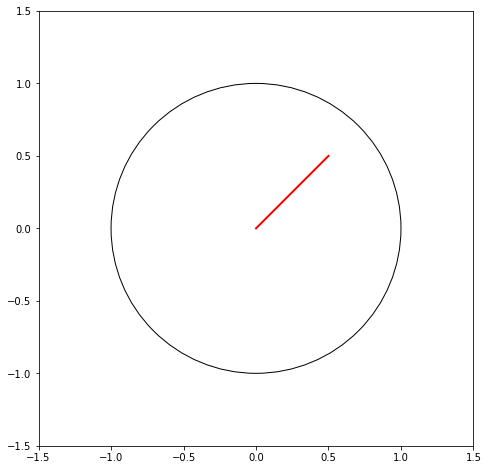

In [155]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Plot a circle
circle = plt.Circle((0, 0), radius=1, fill=False)
ax.add_patch(circle)

# Plot a line within the circle
line, = ax.plot([0, 0.5], [0, 0.5], color='red', linewidth=2)

# Set the aspect ratio to equal
ax.set_aspect('equal')

# Set the limits of the plot
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

# Show the plot
plt.show()

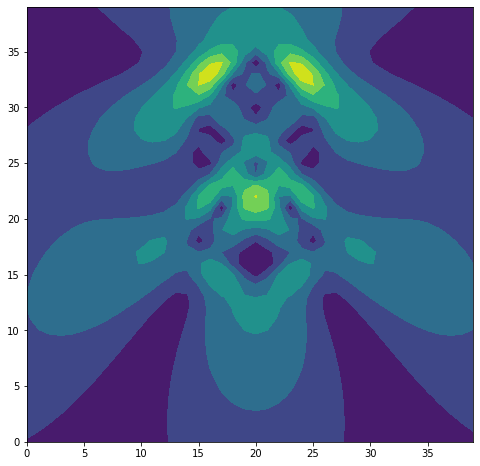

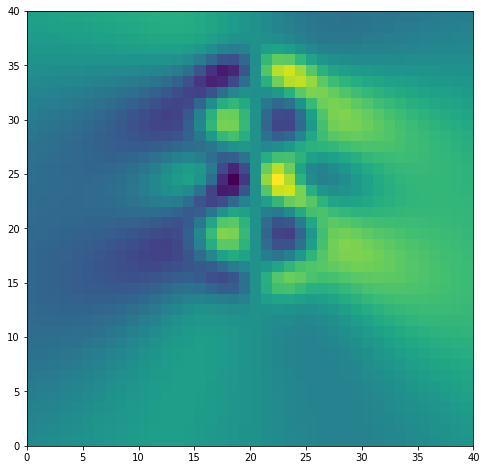

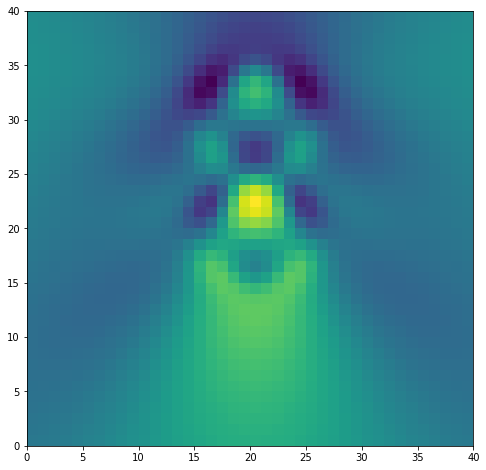

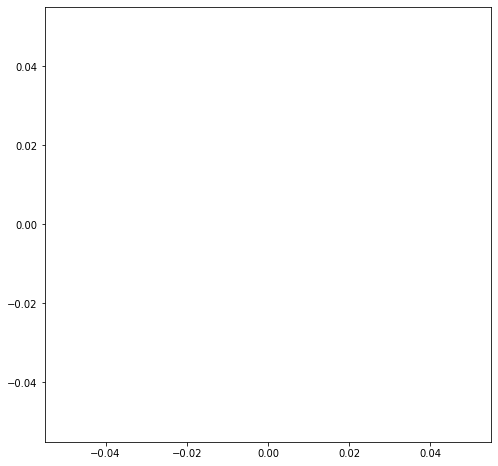

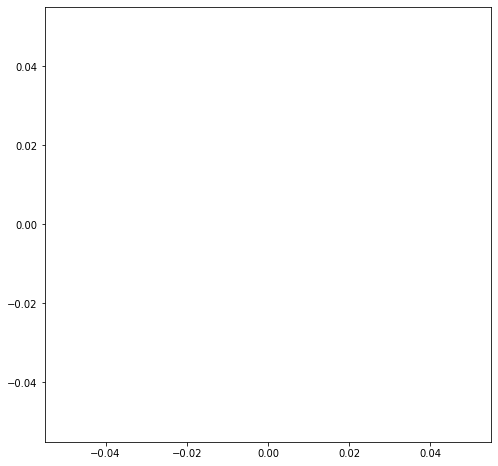

In [86]:
speed = np.sqrt(U**2 + V**2)
plt.contourf(speed)
plt.show()
plt.pcolormesh(U)
plt.show()
plt.pcolormesh(V)
plt.show()
boxsize = 32
newU = U[128 - boxsize:128 + boxsize,128 - boxsize:128 + boxsize]  # == Lons[Xspan[0]:Xspan[1]+1, Yspan[0]:Yspan[1]+1]
newV = V[128 - boxsize:128 + boxsize,128 - boxsize:128 + boxsize]
plt.pcolormesh(newU)
plt.show()
plt.pcolormesh(newV)
plt.show()

In [ ]:
for i in range(16):
    if i == 0:
        U = np.loadtxt("U5_1.txt")
    else:
        U = np.loadtxt("U5_"+str(i*50) + ".txt")